In [2]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
#机器算法模型
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
#切割训练数据和样本数据
from sklearn.model_selection import train_test_split
#用于模型评分
from sklearn.metrics import r2_score


In [3]:
raw_data = pd.read_csv('天猫after（合并日期）.csv').replace(np.NaN,0)
raw_data

,日期,广告形式,产品,展现量,点击量,点击率,总加购数,转化率,ROI,总订单行,...,总费用,是否为钻展广告,是否为超级推荐广告,是否为直通车广告,是否为品销宝广告,点击率/转化率,销售额/ROI,点击量/展现量,加购数/点击量,订单数/加购数
0,2020-11-01,钻展,0.0,188875,5332,2.823031,156.0,1.350338,4.129289,72.0,...,15709.15709,1,0,0,0,2.090611,15709.15709,0.028230,0.029257,2.166667
1,2020-11-02,钻展,0.0,176138,4357,2.473629,100.0,0.665596,2.286853,29.0,...,12177.93890,1,0,0,0,3.716414,12177.93890,0.024736,0.022952,3.448276
2,2020-11-03,钻展,0.0,125159,3214,2.567934,45.0,0.840075,3.844652,27.0,...,7254.89514,1,0,0,0,3.056792,7254.89514,0.025679,0.014001,1.666667
3,2020-11-04,钻展,0.0,86573,2426,2.802259,28.0,0.206101,1.002589,5.0,...,4973.12377,1,0,0,0,13.596562,4973.12377,0.028023,0.011542,5.600000
4,2020-11-05,钻展,0.0,89541,2687,3.000860,18.0,0.111649,0.441200,3.0,...,5000.00000,1,0,0,0,26.877702,5000.00000,0.030009,0.006699,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,2021-02-24,品销宝,0.0,0,0,0.000000,0.0,0.000000,0.000000,0.0,...,0.00000,0,0,0,1,0.000000,0.00000,0.000000,0.000000,0.000000
441,2021-02-25,品销宝,0.0,0,0,0.000000,0.0,0.000000,0.000000,0.0,...,0.00000,0,0,0,1,0.000000,0.00000,0.000000,0.000000,0.000000
442,2021-02-26,品销宝,0.0,0,0,0.000000,0.0,0.000000,0.000000,0.0,...,0.00000,0,0,0,1,0.000000,0.00000,0.000000,0.000000,0.000000
443,2021-02-27,品销宝,0.0,0,0,0.000000,0.0,0.000000,0.000000,0.0,...,0.00000,0,0,0,1,0.000000,0.00000,0.000000,0.000000,0.000000


In [4]:
#y1=销售额/ROI
x_data = raw_data.loc[:,['总费用','是否为钻展广告','是否为超级推荐广告','是否为直通车广告','是否为品销宝广告']]
y1_data = raw_data.loc[:,['销售额/ROI']]

In [5]:
x_train, x_test, y1_train, y1_test = train_test_split(x_data, y1_data, test_size=0.25, random_state=2021)

In [6]:
linear = LinearRegression()
linear.fit(x_train,y1_train)

LinearRegression()

In [7]:
r_sq = linear.score(x_train, y1_train)
print('coefficient of determination(𝑅²) :', r_sq)

print('intercept:', linear.intercept_)

print('slope:', linear.coef_)

coefficient of determination(𝑅²) : 0.9874167507549
intercept: [8.33858637]
slope: [[   0.98375743   -1.17597892 -111.69584901  115.33751252   -2.46568459]]


In [8]:
y1_pred = linear.predict(x_test)
print('predicted response:', y1_pred, sep='\n')

predicted response:
[[ 7.16260746e+00]
 [ 5.87290178e+00]
 [ 1.41105621e+04]
 [ 1.21356199e+04]
 [-1.03357263e+02]
 [ 1.04123917e+04]
 [ 6.45957382e+03]
 [ 7.16260746e+00]
 [ 1.74725630e+04]
 [ 2.90283018e+03]
 [-3.63240316e+01]
 [ 5.58879109e+03]
 [ 6.50598932e+03]
 [ 6.57969242e+03]
 [ 9.33942226e+01]
 [ 7.16260746e+00]
 [-1.03357263e+02]
 [ 1.09211818e+03]
 [-1.03357263e+02]
 [ 1.08929578e+03]
 [ 5.87290178e+00]
 [-1.03357263e+02]
 [ 5.87290178e+00]
 [-1.03357263e+02]
 [ 1.14990009e+04]
 [ 5.87290178e+00]
 [ 2.43893936e+03]
 [ 6.70762024e+03]
 [-1.03357263e+02]
 [ 6.62341060e+03]
 [ 2.38684759e+03]
 [ 7.16260746e+00]
 [ 2.05455583e+03]
 [ 5.87290178e+00]
 [ 8.79224158e+03]
 [ 7.16260746e+00]
 [ 7.16260746e+00]
 [ 5.87290178e+00]
 [ 1.97450033e+04]
 [ 5.08065269e+03]
 [ 1.67655687e+03]
 [ 5.17007624e+03]
 [-1.03357263e+02]
 [ 7.16260746e+00]
 [ 1.54611626e+04]
 [ 7.14421958e+03]
 [ 5.85444677e+03]
 [-1.03357263e+02]
 [-1.03357263e+02]
 [ 2.11828441e+04]
 [ 1.70820998e+04]
 [ 2.226287

In [9]:
from sklearn import metrics
MSE = metrics.mean_squared_error(y1_test,y1_pred)
RMSE = np.sqrt(MSE)
print('MSE:',MSE)
print('RMSE:',RMSE)

MSE: 10817.681581292636
RMSE: 104.00808421124118


Text(0, 0.5, 'predicted data')

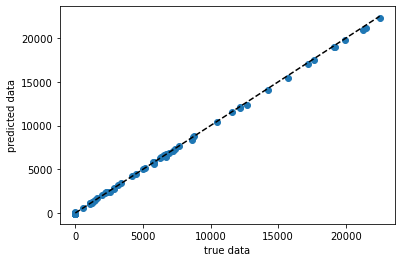

In [10]:
plt.scatter(y1_test, y1_pred)
plt.plot([y1_test.min(),y1_test.max()], [y1_test.min(),y1_test.max()], 'k--')
plt.xlabel('true data')
plt.ylabel('predicted data')

In [11]:
#y2=点击率/转化率
y2_data = raw_data.loc[:,['点击率/转化率']]
x_train, x_test, y2_train, y2_test = train_test_split(x_data, y2_data, test_size=0.25, random_state=2021)
#fit model
linear2 = LinearRegression()
linear2.fit(x_train,y2_train)
r_sq = linear2.score(x_train, y2_train)
print('coefficient of determination(𝑅²) :', r_sq)
print('intercept:', linear2.intercept_)
print('slope:', linear2.coef_)

coefficient of determination(𝑅²) : 0.14898397685909115
intercept: [0.18940623]
slope: [[ 5.03651664e-04  3.33291053e+00 -4.21540348e-01 -3.28026701e+00
   3.68896827e-01]]


In [12]:
#y3=点击量/展现量
y3_data = raw_data.loc[:,['点击量/展现量']]
x_train, x_test, y3_train, y3_test = train_test_split(x_data, y3_data, test_size=0.25, random_state=2021)
#fit model
linear3 = LinearRegression()
linear3.fit(x_train,y3_train)
r_sq = linear3.score(x_train, y3_train)
print('coefficient of determination(𝑅²) :', r_sq)
print('intercept:', linear3.intercept_)
print('slope:', linear3.coef_)

coefficient of determination(𝑅²) : 0.16720133388618197
intercept: [0.01547701]
slope: [[ 1.20668106e-06 -1.13533411e-02 -1.50832807e-02 -9.66759744e-03
   3.61042193e-02]]


In [13]:
#y4=加购数/点击量
y4_data = raw_data.loc[:,['加购数/点击量']]
x_train, x_test, y4_train, y4_test = train_test_split(x_data, y4_data, test_size=0.25, random_state=2021)
#fit model
linear4 = LinearRegression()
linear4.fit(x_train,y4_train)
r_sq = linear4.score(x_train, y4_train)
print('coefficient of determination(𝑅²) :', r_sq)
print('intercept:', linear4.intercept_)
print('slope:', linear4.coef_)

coefficient of determination(𝑅²) : 0.16723077640315698
intercept: [0.04772497]
slope: [[ 3.74549350e-06 -5.03002494e-02 -4.10718807e-02  1.64878459e-02
   7.48842842e-02]]


In [14]:
# y5=订单数/加购数
y5_data = raw_data.loc[:,['订单数/加购数']]
x_train, x_test, y5_train, y5_test = train_test_split(x_data, y5_data, test_size=0.25, random_state=2021)
#fit model
linear5 = LinearRegression()
linear5.fit(x_train,y5_train)
r_sq = linear5.score(x_train, y5_train)
print('coefficient of determination(𝑅²) :', r_sq)
print('intercept:', linear5.intercept_)
print('slope:', linear5.coef_)

coefficient of determination(𝑅²) : 0.12535740827965625
intercept: [1.65990337]
slope: [[ 4.39960777e-04 -1.52394784e-01  7.49948577e-01 -4.07626469e-01
  -1.89927324e-01]]
